 #  A Whale off the Port(folio)
 ---

 In this assignment, you'll get to use what you've learned this week to evaluate the performance among various algorithmic, hedge, and mutual fund portfolios and compare them against the S&P 500 Index.

In [120]:
# Initial imports
import pandas as pd
from matplotlib import pyplot as plt
from scipy.stats import norm
import numpy as np
import datetime as dt
from pathlib import Path

%matplotlib inline

# Data Cleaning

In this section, you will need to read the CSV files into DataFrames and perform any necessary data cleaning steps. After cleaning, combine all DataFrames into a single DataFrame.

Files:

* `whale_returns.csv`: Contains returns of some famous "whale" investors' portfolios.

* `algo_returns.csv`: Contains returns from the in-house trading algorithms from Harold's company.

* `sp500_history.csv`: Contains historical closing prices of the S&P 500 Index.

## Whale Returns

Read the Whale Portfolio daily returns and clean the data

In [121]:
# Reading whale returns
whale_returns_path = Path("General/whale_returns.csv")

# Read in data
#whale_returns = pd.read_csv(whale_returns_path, parse_dates=True, infer_datetime_format=True)
whale_returns = pd.read_csv(whale_returns_path, index_col="Date", infer_datetime_format=True, parse_dates=True)

# Set Date as index
#whale_returns = whale_returns.set_index('Date')

# Sort Date index in ascending order, very important to always sort dates
whale_returns = whale_returns.sort_index(ascending=True)

# print sample of data
whale_returns.head()

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC
Date,,,,
2015-03-02,NaN,NaN,NaN,NaN
2015-03-03,-0.001266,-0.004981,-0.000496,-0.006569
2015-03-04,0.002230,0.003241,-0.002534,0.004213
2015-03-05,0.004016,0.004076,0.002355,0.006726
2015-03-06,-0.007905,-0.003574,-0.008481,-0.013098


In [122]:
#whale_returns.count()

#check for Nulls
whale_returns.isnull()

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC
Date,,,,
2015-03-02,True,True,True,True
2015-03-03,False,False,False,False
2015-03-04,False,False,False,False
2015-03-05,False,False,False,False
2015-03-06,False,False,False,False
...,...,...,...,...
2019-04-25,False,False,False,False
2019-04-26,False,False,False,False
2019-04-29,False,False,False,False


In [124]:
# Count nulls
#whale_returns.isnull().mean() *100
whale_returns.isnull().sum()

SOROS FUND MANAGEMENT LLC      1
PAULSON & CO.INC.              1
TIGER GLOBAL MANAGEMENT LLC    1
BERKSHIRE HATHAWAY INC         1
dtype: int64

In [125]:
# Drop nulls
whale_returns = whale_returns.dropna()

#Validate nulls have been dropped
whale_returns.isnull().sum()

SOROS FUND MANAGEMENT LLC      0
PAULSON & CO.INC.              0
TIGER GLOBAL MANAGEMENT LLC    0
BERKSHIRE HATHAWAY INC         0
dtype: int64

In [126]:
# print sample of data
whale_returns.head(10)

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC
Date,,,,
2015-03-03,-0.001266,-0.004981,-0.000496,-0.006569
2015-03-04,0.002230,0.003241,-0.002534,0.004213
2015-03-05,0.004016,0.004076,0.002355,0.006726
2015-03-06,-0.007905,-0.003574,-0.008481,-0.013098
2015-03-09,0.000582,0.004225,0.005843,-0.001652
2015-03-10,-0.010263,-0.005341,-0.012079,-0.009739
2015-03-11,0.004012,0.005163,0.003312,-0.001147
2015-03-12,0.008265,0.010272,0.013117,0.010801
2015-03-13,-0.002497,-0.001428,-0.003697,-0.008142


In [127]:
# Check Data Types
whale_returns['PAULSON & CO.INC. '].dtype

dtype('float64')

## Algorithmic Daily Returns

Read the algorithmic daily returns and clean the data

In [128]:
# Reading algorithmic returns
algo_returns_path = Path("General/algo_returns.csv")

# Read in data
#algo_returns = pd.read_csv(algo_returns_path, parse_dates=True, infer_datetime_format=True)
algo_returns = pd.read_csv(algo_returns_path, index_col="Date", infer_datetime_format=True, parse_dates=True)

# Set Date as index
#algo_returns = algo_returns.set_index('Date')

# Sort Date index in ascending order, very important to always sort dates
algo_returns = algo_returns.sort_index(ascending=True)

# print sample of data
algo_returns.head(10)

,Algo 1,Algo 2
Date,,
2014-05-28,0.001745,NaN
2014-05-29,0.003978,NaN
2014-05-30,0.004464,NaN
2014-06-02,0.005692,NaN
2014-06-03,0.005292,NaN
2014-06-04,-0.001838,NaN
2014-06-05,0.004062,0.013285
2014-06-06,0.001857,0.008284
2014-06-09,-0.005012,0.005668


In [129]:
algo_returns.isnull()

,Algo 1,Algo 2
Date,,
2014-05-28,False,True
2014-05-29,False,True
2014-05-30,False,True
2014-06-02,False,True
2014-06-03,False,True
...,...,...
2019-04-25,False,False
2019-04-26,False,False
2019-04-29,False,False


In [130]:
# Count nulls
#algo_returns.isnull().count()
algo_returns.isnull().sum()

Algo 1    0
Algo 2    6
dtype: int64

In [131]:
# Drop nulls
algo_returns = algo_returns.dropna()

#Validate nulls have been dropped
algo_returns.isnull().sum()

Algo 1    0
Algo 2    0
dtype: int64

In [132]:
# print sample of data
algo_returns.head(10)

,Algo 1,Algo 2
Date,,
2014-06-05,0.004062,0.013285
2014-06-06,0.001857,0.008284
2014-06-09,-0.005012,0.005668
2014-06-10,0.004406,-0.000735
2014-06-11,0.004760,-0.003761
2014-06-12,-0.000028,-0.003841
2014-06-13,0.001917,-0.000814
2014-06-16,0.001084,0.001831
2014-06-17,0.000922,0.006870


In [133]:
# Check Data Types
algo_returns['Algo 1'].dtype

dtype('float64')

## S&P 500 Returns

Read the S&P 500 historic closing prices and create a new daily returns DataFrame from the data. 

In [135]:
# Reading S&P 500 Closing Prices
sp500_hist_path = Path("General/sp500_history.csv")

# Read in data
#sp500_hist = pd.read_csv(sp500_hist_path, infer_datetime_format=True, parse_dates=True)
sp500_hist = pd.read_csv(sp500_hist_path, index_col="Date", infer_datetime_format=True, parse_dates=True)

#Convert Date Column Format to YYYY-MM-DD
#sp500_hist['Date'] = pd.to_datetime(sp500_hist['Date'])

# Set Date as index
#sp500_hist = sp500_hist.set_index('Date')

# Sort Date index in ascending order, very important to always sort dates
sp500_hist = sp500_hist.sort_index(ascending=True)

# print sample of data
sp500_hist.head()

,Close
Date,
2012-10-01,$1444.49
2012-10-02,$1445.75
2012-10-03,$1450.99
2012-10-04,$1461.40
2012-10-05,$1460.93


In [136]:
# Check for nulls
sp500_hist.isnull()

,Close
Date,
2012-10-01,False
2012-10-02,False
2012-10-03,False
2012-10-04,False
2012-10-05,False
...,...
2019-04-16,False
2019-04-17,False
2019-04-18,False


In [137]:
# Count nulls
#sp500_hist.isnull().count()
sp500_hist.isnull().sum()

Close    0
dtype: int64

In [138]:
# Print sample to check dtype
sp500_hist['Close'].head(10)

Date
2012-10-01    $1444.49
2012-10-02    $1445.75
2012-10-03    $1450.99
2012-10-04    $1461.40
2012-10-05    $1460.93
2012-10-08    $1455.88
2012-10-09    $1441.48
2012-10-10    $1432.56
2012-10-11    $1432.84
2012-10-12    $1428.59
Name: Close, dtype: object

In [139]:
# Check Data Types
sp500_hist['Close'].dtype

dtype('O')

In [140]:
# Fix Data Types
sp500_hist["Close"] = sp500_hist["Close"].str.replace("$", "")
sp500_hist["Close"]

Date
2012-10-01    1444.49
2012-10-02    1445.75
2012-10-03    1450.99
2012-10-04    1461.40
2012-10-05    1460.93
               ...   
2019-04-16    2907.06
2019-04-17    2900.45
2019-04-18    2905.03
2019-04-22    2907.97
2019-04-23    2933.68
Name: Close, Length: 1649, dtype: object

In [141]:
# Fix Data Types by casting close as float
sp500_hist['Close'] = sp500_hist['Close'].astype('float')
sp500_hist['Close'].dtype

dtype('float64')

In [142]:
#Calculate Daily Returns using the 'pct_change()' function
sp500_hist = sp500_hist.pct_change().dropna()
sp500_hist.head()

,Close
Date,
2012-10-02,0.000872
2012-10-03,0.003624
2012-10-04,0.007174
2012-10-05,-0.000322
2012-10-08,-0.003457


In [143]:
# Check for nulls
sp500_hist.isnull()

,Close
Date,
2012-10-02,False
2012-10-03,False
2012-10-04,False
2012-10-05,False
2012-10-08,False
...,...
2019-04-16,False
2019-04-17,False
2019-04-18,False


In [144]:
# Count nulls
sp500_hist.isnull().sum()

Close    0
dtype: int64

In [145]:
# Print sample
sp500_hist.head(10)

,Close
Date,
2012-10-02,0.000872
2012-10-03,0.003624
2012-10-04,0.007174
2012-10-05,-0.000322
2012-10-08,-0.003457
2012-10-09,-0.009891
2012-10-10,-0.006188
2012-10-11,0.000195
2012-10-12,-0.002966


In [146]:
# Rename `Close` Column to be specific to this portfolio.
sp500_hist = sp500_hist.rename(columns={
    "Close": "S&P 500 Daily Returns"
})
sp500_hist.head()

,S&P 500 Daily Returns
Date,
2012-10-02,0.000872
2012-10-03,0.003624
2012-10-04,0.007174
2012-10-05,-0.000322
2012-10-08,-0.003457


## Combine Whale, Algorithmic, and S&P 500 Returns

In [147]:
# Join Whale Returns, Algorithmic Returns, and the S&P 500 Returns into a single DataFrame with columns for each portfolio's returns.
all_joined_port_returns = pd.concat([whale_returns, algo_returns,sp500_hist], axis="columns", join="inner")
all_joined_port_returns.head(10)

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Algo 1,Algo 2,S&P 500 Daily Returns
Date,,,,,,,
2015-03-03,-0.001266,-0.004981,-0.000496,-0.006569,-0.001942,-0.000949,-0.004539
2015-03-04,0.002230,0.003241,-0.002534,0.004213,-0.008589,0.002416,-0.004389
2015-03-05,0.004016,0.004076,0.002355,0.006726,-0.000955,0.004323,0.001196
2015-03-06,-0.007905,-0.003574,-0.008481,-0.013098,-0.004957,-0.011460,-0.014174
2015-03-09,0.000582,0.004225,0.005843,-0.001652,-0.005447,0.001303,0.003944
2015-03-10,-0.010263,-0.005341,-0.012079,-0.009739,-0.001392,-0.012155,-0.016961
2015-03-11,0.004012,0.005163,0.003312,-0.001147,0.002994,0.000605,-0.001918
2015-03-12,0.008265,0.010272,0.013117,0.010801,-0.002935,0.011667,0.012601
2015-03-13,-0.002497,-0.001428,-0.003697,-0.008142,-0.005423,-0.005062,-0.006075


---

# Conduct Quantitative Analysis

In this section, you will calculate and visualize performance and risk metrics for the portfolios.

## Performance Anlysis

#### Calculate and Plot the daily returns.

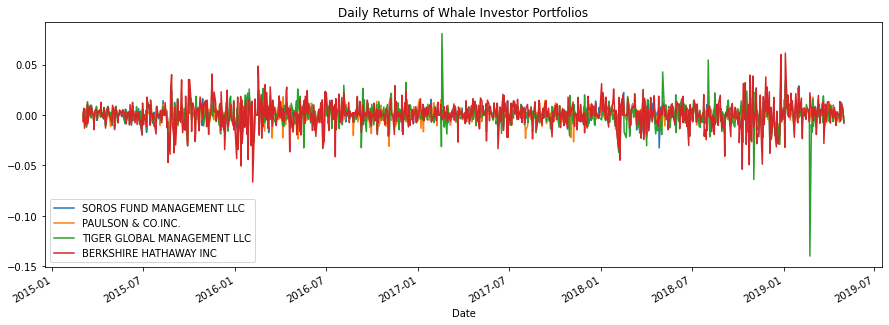

In [148]:
# Plot combined daily returns of Whale investors portfolios
whale_returns.plot(figsize=(15,5), title='Daily Returns of Whale Investor Portfolios')

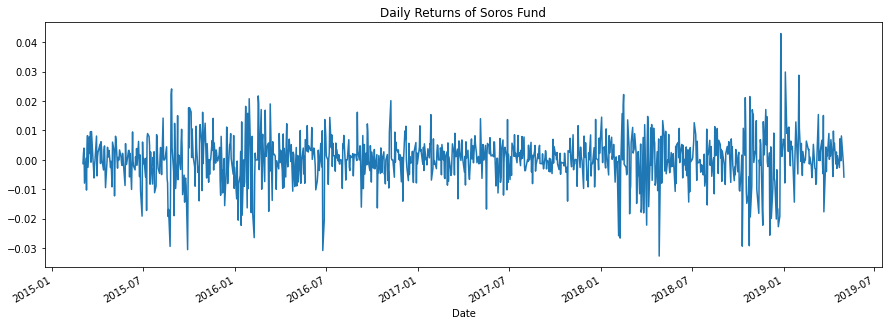

In [149]:
# Plot daily returns of individual Whale investor portfolios
whale_returns['SOROS FUND MANAGEMENT LLC'].plot(figsize=(15,5), title='Daily Returns of Soros Fund')

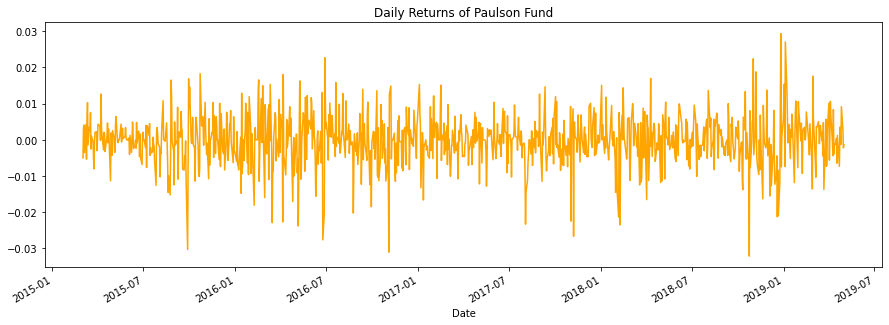

In [150]:
# Plot daily returns of individual Whale investor portfolios
whale_returns['PAULSON & CO.INC. '].plot(figsize=(15,5), title='Daily Returns of Paulson Fund', color='orange')

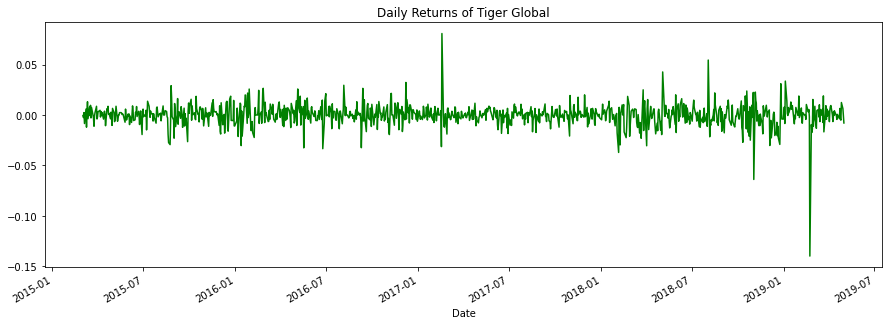

In [151]:
# Plot daily returns of individual Whale investor portfolios
whale_returns['TIGER GLOBAL MANAGEMENT LLC'].plot(figsize=(15,5), title='Daily Returns of Tiger Global', color='green')

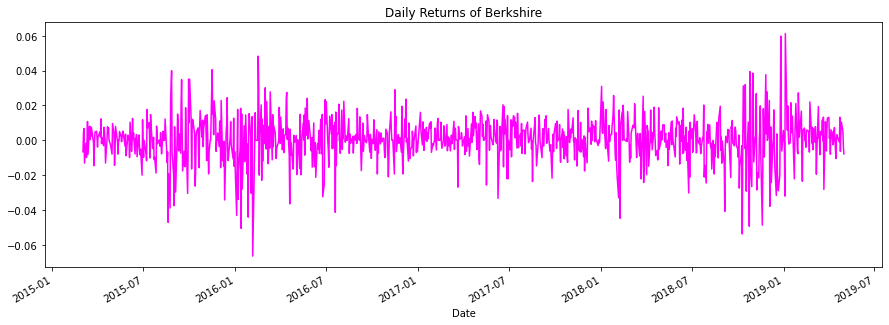

In [152]:
# Plot daily returns of individual Whale investor portfolios
whale_returns['BERKSHIRE HATHAWAY INC'].plot(figsize=(15,5), title='Daily Returns of Berkshire', color='magenta')

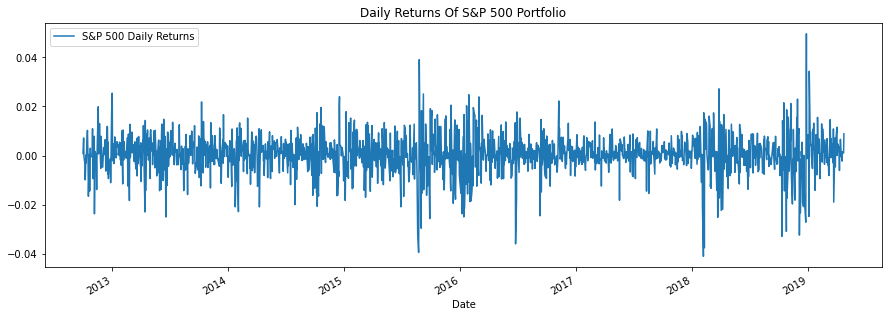

In [153]:
# Plot daily returns of S&P 500 portfolios
sp500_hist.plot(figsize=(15,5), title='Daily Returns Of S&P 500 Portfolio')

In [ ]:
#slice and plot S&P 500 Daily Returns from 2015 - 2019 to match portfolio time periods
#six_month_filtered_df = bac_df.loc['2017-01-03':'2017-06-03', :]
#six_month_filtered_df

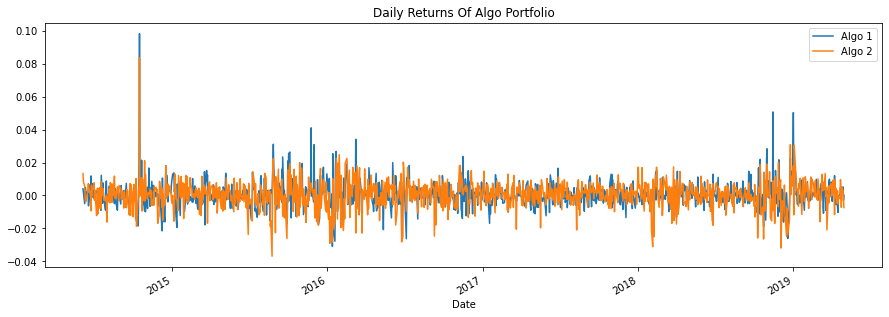

In [154]:
# Plot combined daily returns of Algo portfolios
algo_returns.plot(figsize=(15,5), title='Daily Returns Of Algo Portfolio')

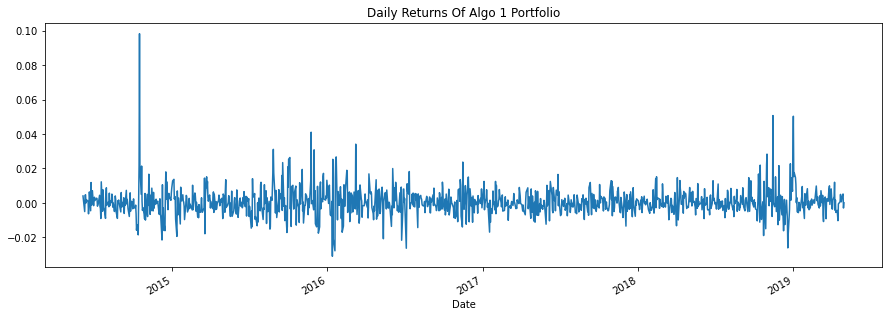

In [155]:
# Plot daily returns of Algo1 portfolios
algo_returns['Algo 1'].plot(figsize=(15,5), title='Daily Returns Of Algo 1 Portfolio')

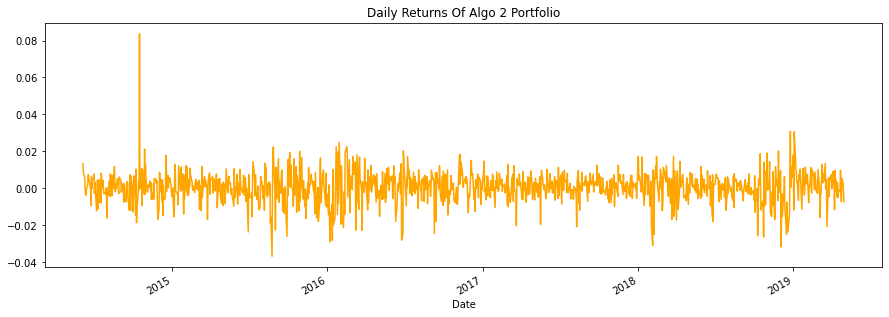

In [156]:
# Plot daily returns of Algo2 portfolios
algo_returns['Algo 2'].plot(figsize=(15,5), title='Daily Returns Of Algo 2 Portfolio', color='orange')

#### Calculate and Plot cumulative returns.

In [157]:
# Calculate cumulative returns of all portfolios
cumulative_port_returns = (1 + all_joined_port_returns).cumprod() - 1
cumulative_port_returns.head(10)

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Algo 1,Algo 2,S&P 500 Daily Returns
Date,,,,,,,
2015-03-03,-0.001266,-0.004981,-0.000496,-0.006569,-0.001942,-0.000949,-0.004539
2015-03-04,0.000962,-0.001755,-0.003028,-0.002383,-0.010514,0.001464,-0.008907
2015-03-05,0.004981,0.002314,-0.000681,0.004327,-0.011459,0.005794,-0.007722
2015-03-06,-0.002963,-0.001269,-0.009156,-0.008828,-0.016359,-0.005733,-0.021786
2015-03-09,-0.002383,0.002951,-0.003367,-0.010466,-0.021717,-0.004437,-0.017928
2015-03-10,-0.012621,-0.002405,-0.015405,-0.020103,-0.023079,-0.016538,-0.034585
2015-03-11,-0.008660,0.002746,-0.012145,-0.021226,-0.020154,-0.015944,-0.036436
2015-03-12,-0.000467,0.013045,0.000813,-0.010654,-0.023029,-0.004463,-0.024294
2015-03-13,-0.002963,0.011598,-0.002887,-0.018710,-0.028327,-0.009502,-0.030221


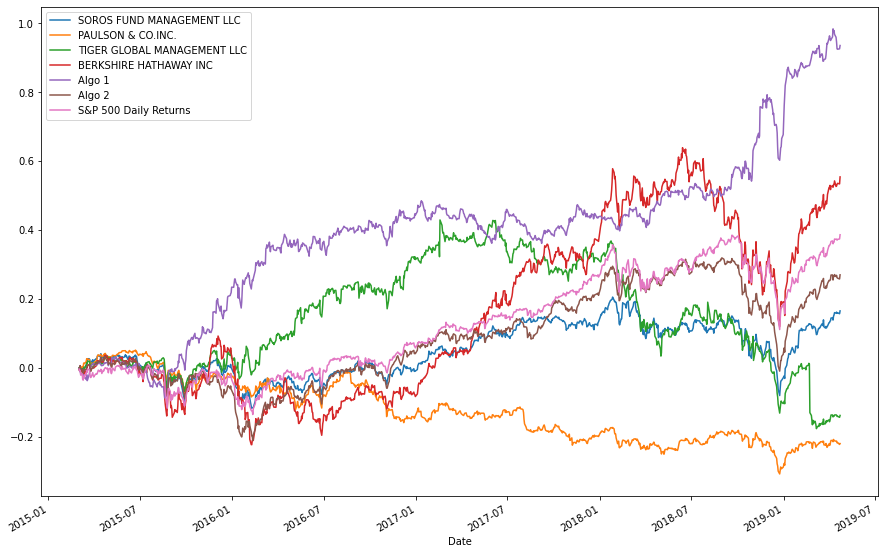

In [158]:
# Plot cumulative returns
cumulative_port_returns.plot(figsize=(15,10))

---

## Risk Analysis

Determine the _risk_of each portfolio:

1. Create a box plot for each portfolio.
2. Calculate the standard deviation for all portfolios
4. Determine which portfolios are riskier than the S&P 500
5. Calculate the Annualized Standard Deviation

### Create a box plot for each portfolio


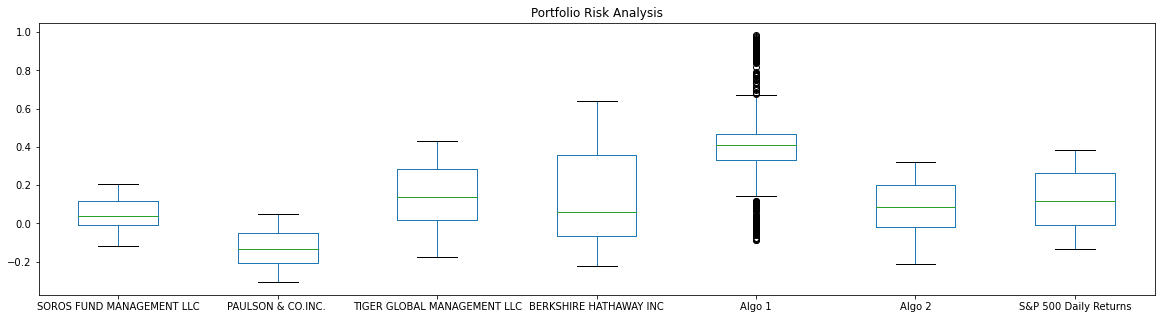

In [161]:
# Box plot to visually show risk
#box_plot_port_returns = all_joined_port_returns.plot.box(figsize=(20,5), title='Portfolio Risk Analysis')
box_plot_port_returns = cumulative_port_returns.plot.box(figsize=(20,5), title='Portfolio Risk Analysis')

### Calculate Standard Deviations

In [162]:
# Calculate the daily standard deviations of all portfolios
all_port_daily_std = all_joined_port_returns.std().sort_values(ascending=False)
#all_port_daily_std = cumulative_port_returns.std().sort_values(ascending=False)
all_port_daily_std.head(10)

BERKSHIRE HATHAWAY INC         0.012919
TIGER GLOBAL MANAGEMENT LLC    0.010894
S&P 500 Daily Returns          0.008554
Algo 2                         0.008342
SOROS FUND MANAGEMENT LLC      0.007895
Algo 1                         0.007620
PAULSON & CO.INC.              0.007023
dtype: float64

### Determine which portfolios are riskier than the S&P 500

In [163]:
# Calculate the daily standard deviation of S&P 500
sp500_hist_daily_std = sp500_hist.std()
sp500_hist_daily_std.head()

S&P 500 Daily Returns    0.008111
dtype: float64

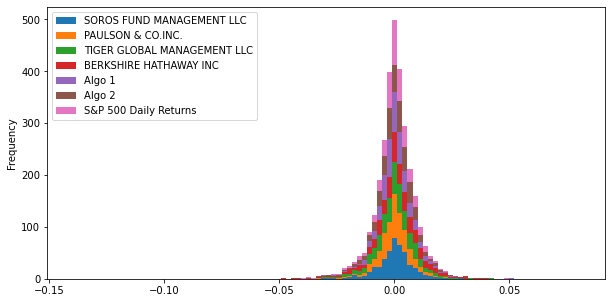

In [164]:
# Determine which portfolios are riskier than the S&P 500. 
#Based on histogram seems Berkshire & Alogo1 are risker than S&P 500
all_joined_port_returns.plot.hist(stacked=True, bins=100, density=True, figsize=(10,5))

### Calculate the Annualized Standard Deviation

In [165]:
# Calculate the annualized standard deviation (252 trading days) for all portfolios
#all_port_annualized_std = all_port_daily_std.std() * np.sqrt(252)
#all_port_annualized_std

all_port_annualized_std = all_port_daily_std * np.sqrt(252)
all_port_annualized_std.head(10)

BERKSHIRE HATHAWAY INC         0.205077
TIGER GLOBAL MANAGEMENT LLC    0.172936
S&P 500 Daily Returns          0.135786
Algo 2                         0.132430
SOROS FUND MANAGEMENT LLC      0.125335
Algo 1                         0.120967
PAULSON & CO.INC.              0.111488
dtype: float64

In [166]:
# Method #1 - Calculate the annualized standard deviation (252 trading days) for S&P 500 - annualizing daily standard deviation 
sp500_hist_annualized_std = sp500_hist_daily_std * np.sqrt(252)
sp500_hist_annualized_std.head()



S&P 500 Daily Returns    0.128762
dtype: float64

In [80]:
# Method #2 - Calculate the annualized standard deviation (252 trading days) for S&P 500 - applying std function to daily returns and then annulizing the deviation
sp500_hist_annualized_std = sp500_hist.std() * np.sqrt(252)
sp500_hist_annualized_std

S&P 500 Daily Returns    0.128762
dtype: float64

In [242]:
# Calculate 21-day rolling standard deviation
all_joined_port_rolling_returns = all_joined_port_returns.rolling(window=21).std().dropna()
all_joined_port_rolling_returns.head(10)

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Algo 1,Algo 2,S&P 500 Daily Returns
Date,,,,,,,
2015-03-31,0.005764,0.004641,0.006731,0.007108,0.007866,0.006867,0.009105
2015-04-01,0.005744,0.004467,0.006750,0.007005,0.007886,0.006894,0.009095
2015-04-02,0.005749,0.004502,0.006739,0.006958,0.007601,0.006955,0.009114
2015-04-06,0.005792,0.004492,0.006786,0.006884,0.007648,0.007028,0.009246
2015-04-07,0.005452,0.004385,0.006486,0.006193,0.007531,0.006530,0.008707
2015-04-08,0.005549,0.005034,0.006419,0.006654,0.007447,0.006561,0.008684
2015-04-09,0.004855,0.004803,0.005699,0.006199,0.007588,0.005872,0.007793
2015-04-10,0.004864,0.004741,0.005688,0.006162,0.007622,0.005921,0.007809
2015-04-13,0.004791,0.004391,0.005138,0.005905,0.007652,0.005487,0.007476


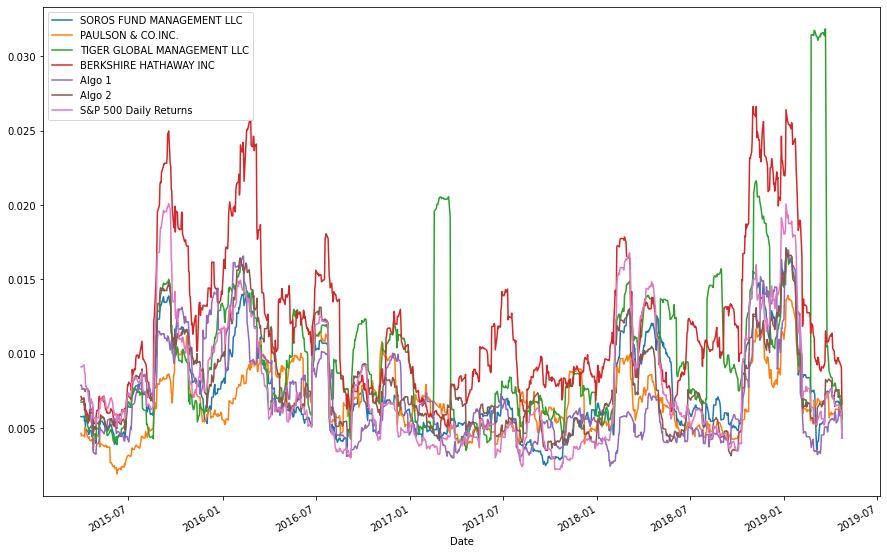

In [246]:
# Plot rolling standard deviation
all_joined_port_rolling_returns.plot(figsize=(15,10))

---

## Rolling Statistics

Risk changes over time. Analyze the rolling statistics for Risk and Beta. 

1. Calculate and plot the rolling standard deviation for the S&P 500 using a 21-day window
2. Calculate the correlation between each stock to determine which portfolios may mimick the S&P 500
3. Choose one portfolio, then calculate and plot the 60-day rolling beta between it and the S&P 500

### Calculate and plot rolling `std` for all portfolios with 21-day window

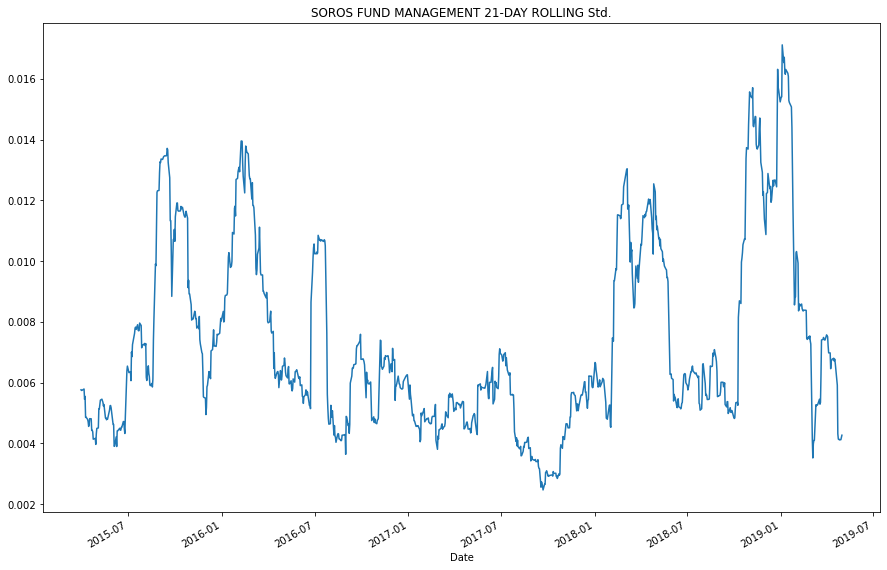

In [167]:
# Calculate whale_returns['SOROS FUND MANAGEMENT LLC'].ylabelthe rolling standard deviation for all portfolios using a 21-day window
# Plot the rolling standard deviation

whale_returns['SOROS FUND MANAGEMENT LLC'].rolling(window=21).std().plot(title="SOROS FUND MANAGEMENT 21-DAY ROLLING Std.", figsize=(15,10))

#https://stackoverflow.com/questions/10138085/python-plot-normal-distribution

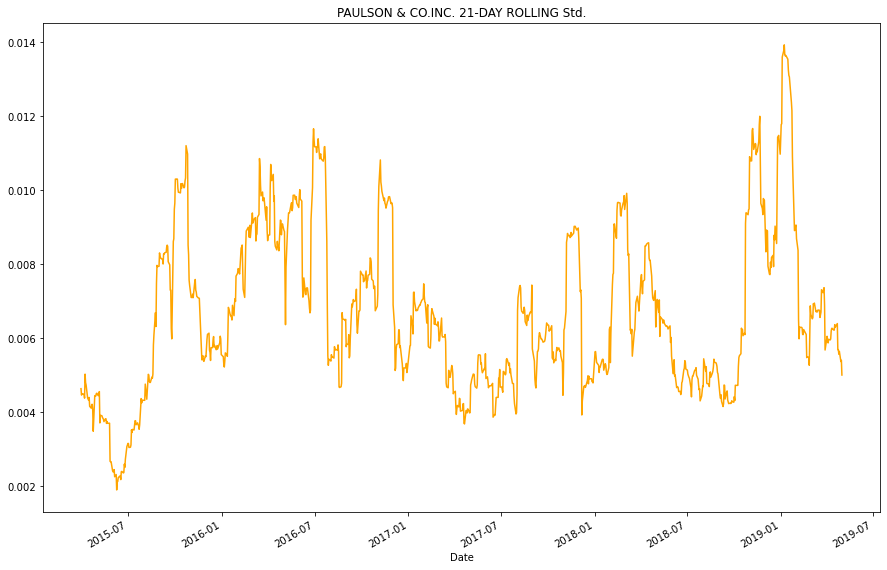

In [168]:
# Calculate the rolling standard deviation for all portfolios using a 21-day window
# Plot the rolling standard deviation

whale_returns['PAULSON & CO.INC. '].rolling(window=21).std().plot(title="PAULSON & CO.INC. 21-DAY ROLLING Std.", color='orange', figsize=(15,10))

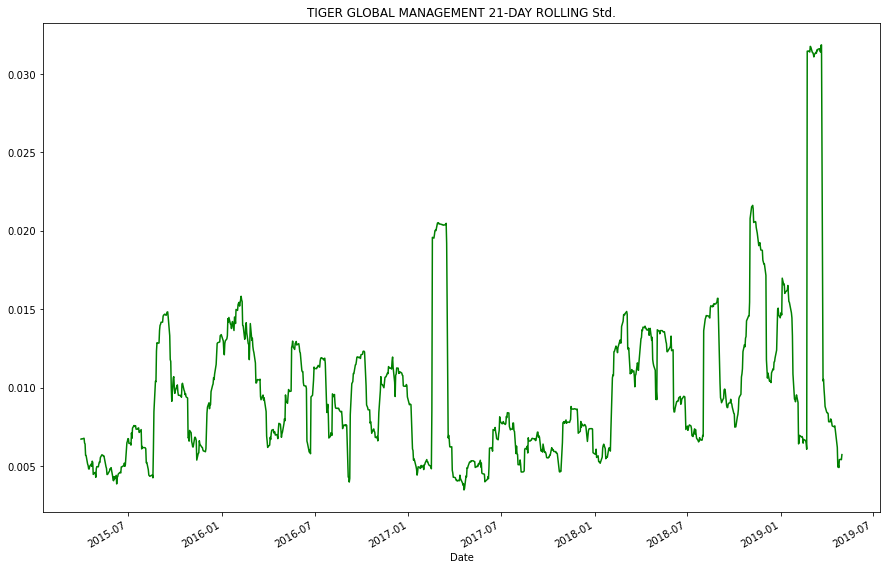

In [169]:
# Calculate the rolling standard deviation for all portfolios using a 21-day window
# Plot the rolling standard deviation

whale_returns['TIGER GLOBAL MANAGEMENT LLC'].rolling(window=21).std().plot(title="TIGER GLOBAL MANAGEMENT 21-DAY ROLLING Std.", color='green', figsize=(15,10))

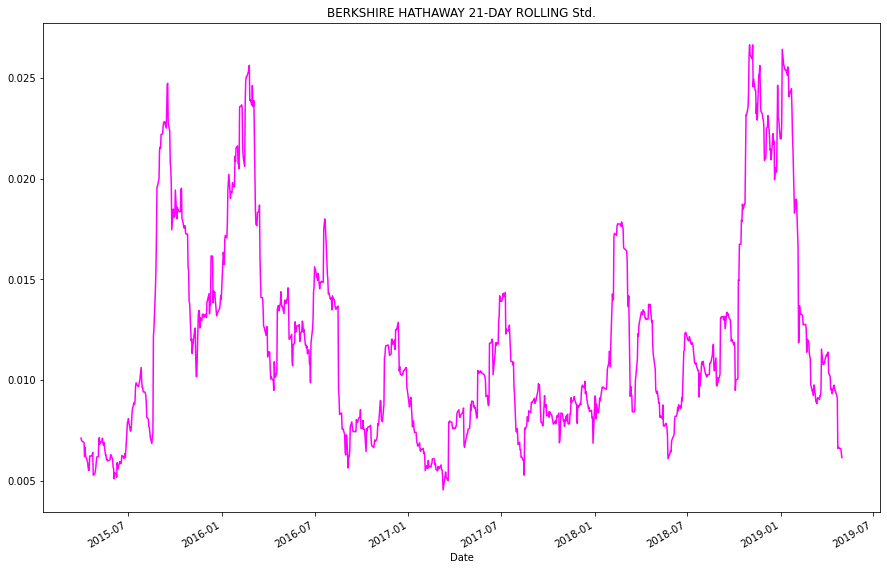

In [170]:
# Calculate the rolling standard deviation for all portfolios using a 21-day window
# Plot the rolling standard deviation

whale_returns['BERKSHIRE HATHAWAY INC'].rolling(window=21).std().plot(title="BERKSHIRE HATHAWAY 21-DAY ROLLING Std.", color='magenta', figsize=(15,10))

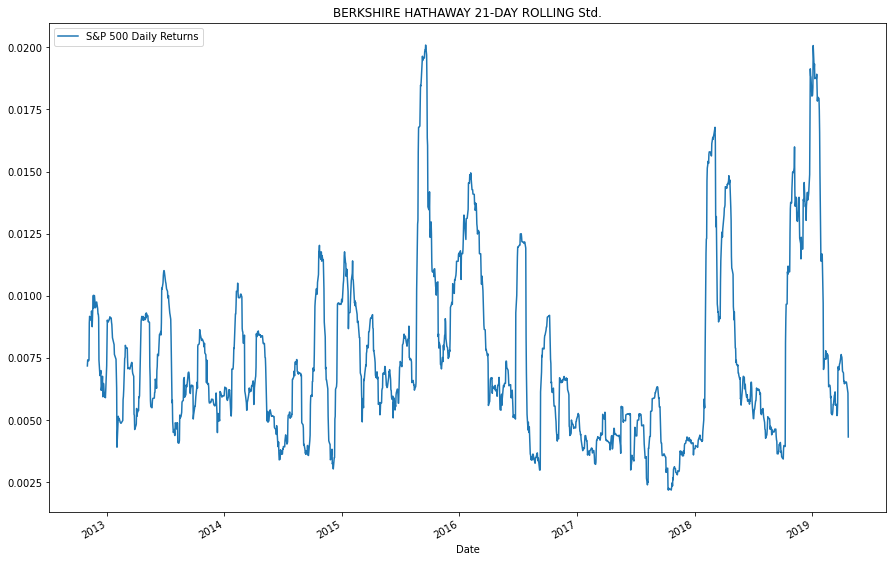

In [171]:
# Calculate the rolling standard deviation for all portfolios using a 21-day window
# Plot the rolling standard deviation

sp500_hist.rolling(window=21).std().plot(title="BERKSHIRE HATHAWAY 21-DAY ROLLING Std.", figsize=(15,10))

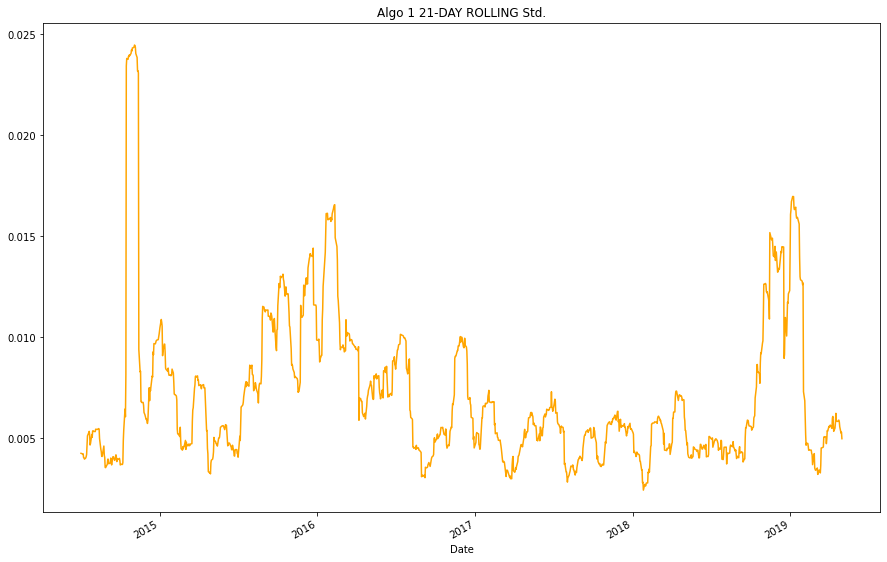

In [173]:
# Calculate the rolling standard deviation for all portfolios using a 21-day window
# Plot the rolling standard deviation

algo_returns['Algo 1'].rolling(window=21).std().plot(title="Algo 1 21-DAY ROLLING Std.", color='orange', figsize=(15,10))

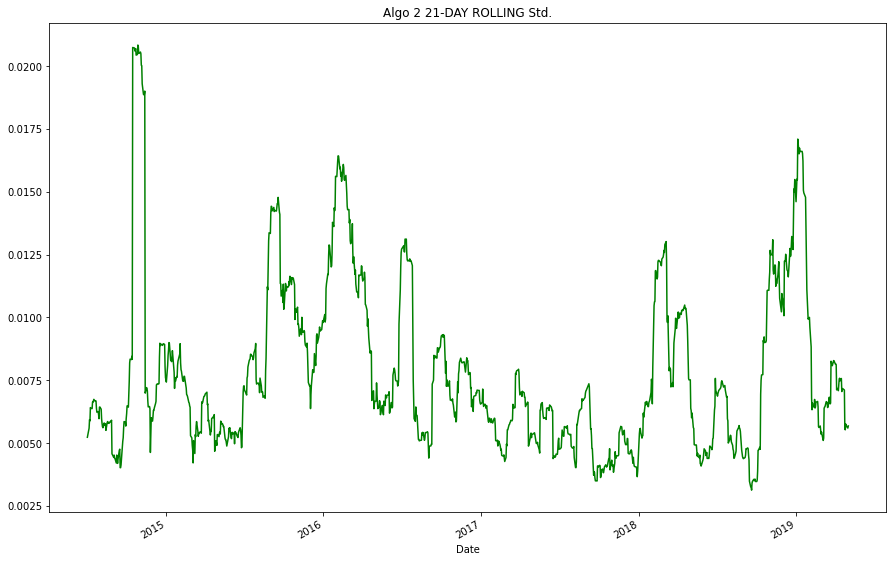

In [174]:
# Calculate the rolling standard deviation for all portfolios using a 21-day window
# Plot the rolling standard deviation

algo_returns['Algo 2'].rolling(window=21).std().plot(title="Algo 2 21-DAY ROLLING Std.", color='green', figsize=(15,10))

### Calculate and plot the correlation

In [175]:
#Calculate & Display the correlation matrix the correlation
corr_all_join_port_returns = all_joined_port_returns.corr()
corr_all_join_port_returns

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Algo 1,Algo 2,S&P 500 Daily Returns
SOROS FUND MANAGEMENT LLC,1.000000,0.699914,0.561243,0.754360,0.321211,0.826873,0.837864
PAULSON & CO.INC.,0.699914,1.000000,0.434479,0.545623,0.268840,0.678152,0.669732
TIGER GLOBAL MANAGEMENT LLC,0.561243,0.434479,1.000000,0.424423,0.164387,0.507414,0.623946
BERKSHIRE HATHAWAY INC,0.754360,0.545623,0.424423,1.000000,0.292033,0.688082,0.751371
Algo 1,0.321211,0.268840,0.164387,0.292033,1.000000,0.288243,0.279494
Algo 2,0.826873,0.678152,0.507414,0.688082,0.288243,1.000000,0.858764
S&P 500 Daily Returns,0.837864,0.669732,0.623946,0.751371,0.279494,0.858764,1.000000


### Calculate and Plot Beta for a chosen portfolio and the S&P 500

In [176]:
# Calculate covariance of a single portfolio

covar_whale_berk = whale_returns['BERKSHIRE HATHAWAY INC'].cov(sp500_hist['S&P 500 Daily Returns'])
covar_whale_berk

8.302834941861692e-05

In [177]:
# Calculate variance of S&P 500
var_sp500_hist = sp500_hist['S&P 500 Daily Returns'].var()
var_sp500_hist

6.579270583158746e-05

In [178]:
# Computing beta
berk_beta = covar_whale_berk / var_sp500_hist
berk_beta

1.2619689123464282

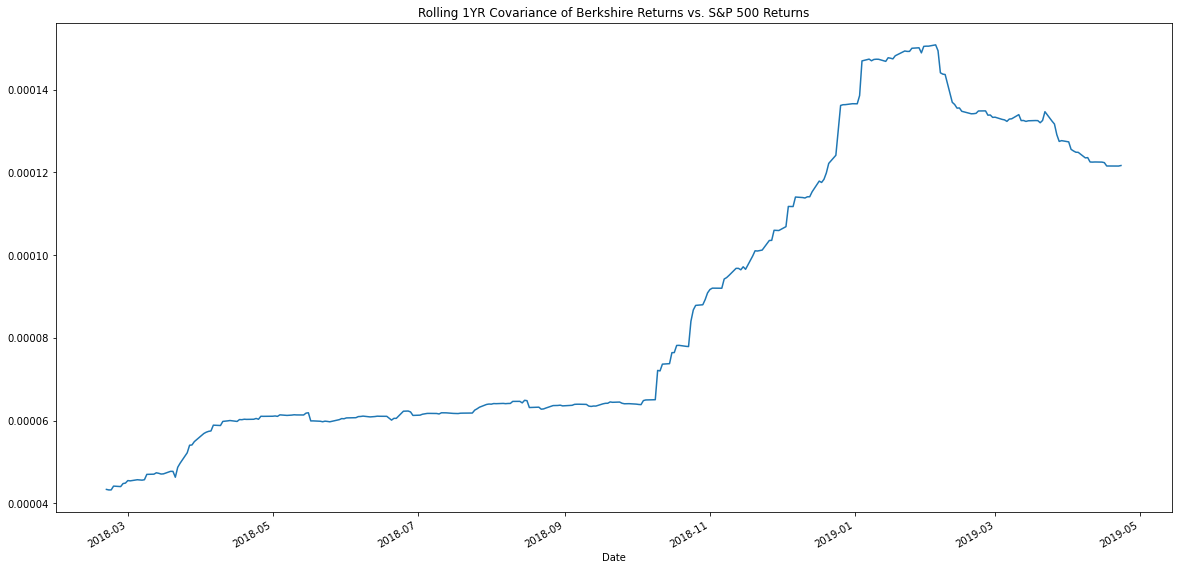

In [183]:
# Calculate 1YR rolling covariance of Berkshire vs. S&P 500 and plot the data
rolling_covar_whale_berk = whale_returns['BERKSHIRE HATHAWAY INC'].rolling(window=252).cov(sp500_hist['S&P 500 Daily Returns'])
rolling_covar_whale_berk.plot(figsize=(20, 10), title='Rolling 1YR Covariance of Berkshire Returns vs. S&P 500 Returns')

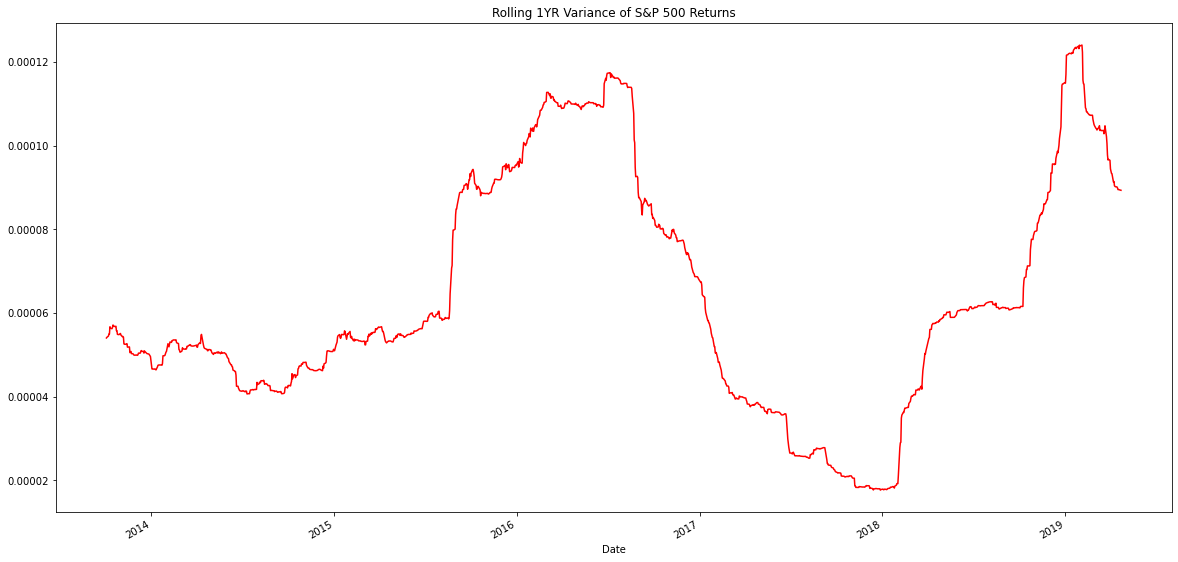

In [186]:
# Calculate 1YR rolling variance of Berkshire vs. S&P 500 and plot the data
rolling_var_whale_berk = sp500_hist['S&P 500 Daily Returns'].rolling(window=252).var()
rolling_var_whale_berk.plot(figsize=(20, 10), title='Rolling 1YR Variance of S&P 500 Returns', color='red')

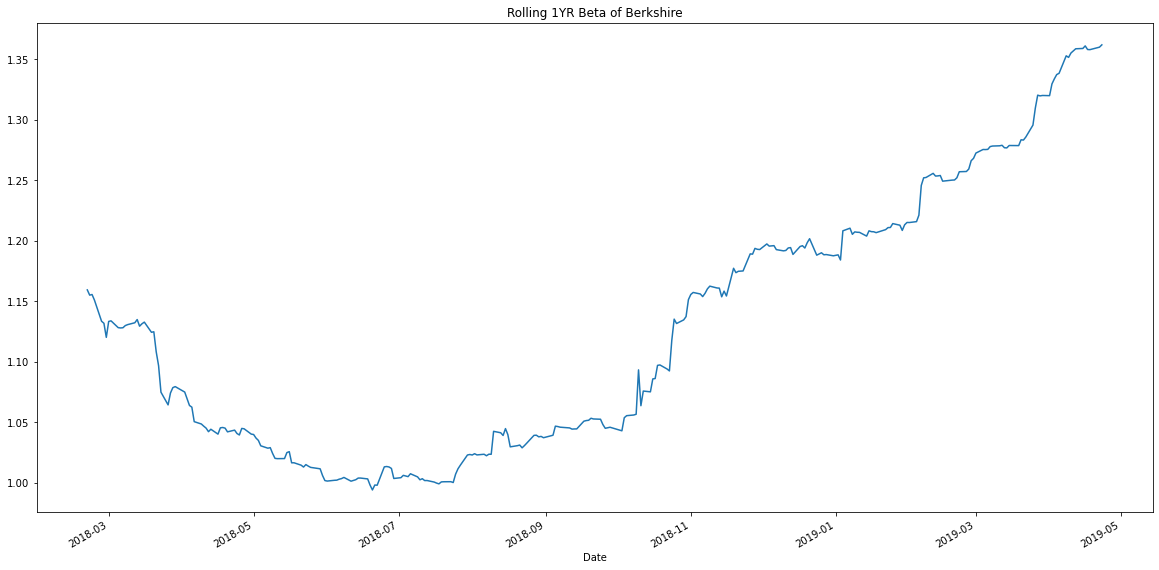

In [187]:
# Plot beta trend
rolling_beta = rolling_covar_whale_berk / rolling_var_whale_berk
rolling_beta.plot(figsize=(20, 10), title='Rolling 1YR Beta of Berkshire')

## Rolling Statistics Challenge: Exponentially Weighted Average 

An alternative way to calculate a rolling window is to take the exponentially weighted moving average. This is like a moving window average, but it assigns greater importance to more recent observations. Try calculating the [`ewm`](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.ewm.html) with a 21-day half-life.

In [232]:
# Use `ewm` to calculate the rolling window
berk_ewma_21 = whale_returns['BERKSHIRE HATHAWAY INC'].ewm(com=21).mean()
berk_ewma_21

Date
2015-03-03   -0.006569
2015-03-04   -0.001052
2015-03-05    0.001662
2015-03-06   -0.002289
2015-03-09   -0.002150
                ...   
2019-04-25    0.002004
2019-04-26    0.002387
2019-04-29    0.002516
2019-04-30    0.002233
2019-05-01    0.001776
Name: BERKSHIRE HATHAWAY INC, Length: 1059, dtype: float64

---

# Sharpe Ratios
In reality, investment managers and thier institutional investors look at the ratio of return-to-risk, and not just returns alone. After all, if you could invest in one of two portfolios, and each offered the same 10% return, yet one offered lower risk, you'd take that one, right?

### Using the daily returns, calculate and visualize the Sharpe ratios using a bar plot

In [200]:
# Annualized Sharpe Ratios
#all_port_daily_std

all_joined_port_returns_sharpe_ratios = (all_joined_port_returns.mean() * 252) / (all_joined_port_returns.std() * np.sqrt(252))
all_joined_port_returns_sharpe_ratios

SOROS FUND MANAGEMENT LLC      0.356417
PAULSON & CO.INC.             -0.483570
TIGER GLOBAL MANAGEMENT LLC   -0.121060
BERKSHIRE HATHAWAY INC         0.621810
Algo 1                         1.378648
Algo 2                         0.501364
S&P 500 Daily Returns          0.648267
dtype: float64

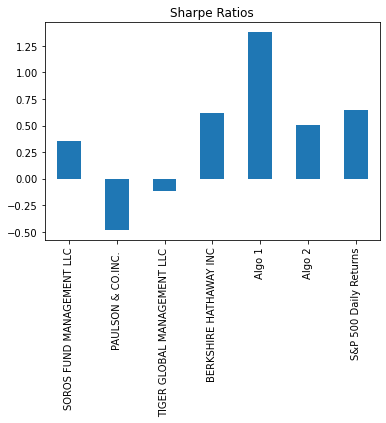

In [201]:
# Visualize the sharpe ratios as a bar plot
all_joined_port_returns_sharpe_ratios.plot(kind="bar", title="Sharpe Ratios")

### Determine whether the algorithmic strategies outperform both the market (S&P 500) and the whales portfolios.

Write your answer here!
Answer: Algo 1 outperformed both the market and whales portfolios

---

# Create Custom Portfolio

In this section, you will build your own portfolio of stocks, calculate the returns, and compare the results to the Whale Portfolios and the S&P 500. 

1. Choose 3-5 custom stocks with at last 1 year's worth of historic prices and create a DataFrame of the closing prices and dates for each stock.
2. Calculate the weighted returns for the portfolio assuming an equal number of shares for each stock
3. Join your portfolio returns to the DataFrame that contains all of the portfolio returns
4. Re-run the performance and risk analysis with your portfolio to see how it compares to the others
5. Include correlation analysis to determine which stocks (if any) are correlated

## Choose 3-5 custom stocks with at last 1 year's worth of historic prices and create a DataFrame of the closing prices and dates for each stock.

For this demo solution, we fetch data from three companies listes in the S&P 500 index.

* `GOOG` - [Google, LLC](https://en.wikipedia.org/wiki/Google)

* `AAPL` - [Apple Inc.](https://en.wikipedia.org/wiki/Apple_Inc.)

* `COST` - [Costco Wholesale Corporation](https://en.wikipedia.org/wiki/Costco)

In [206]:
# Reading data from 1st stock
goo_close_prices = Path("General/goog_historical.csv")

goo_close_prices = pd.read_csv(goo_close_prices, index_col="Trade Date", infer_datetime_format=True, parse_dates=True)

# Sort Date index in ascending order, very important to always sort dates
goo_close_prices = goo_close_prices.sort_index(ascending=True)

# print sample of data
goo_close_prices.head()

,Symbol,NOCP
Trade Date,,
2018-05-11,GOOG,1098.26
2018-05-14,GOOG,1100.20
2018-05-15,GOOG,1079.23
2018-05-16,GOOG,1081.77
2018-05-17,GOOG,1078.59


In [207]:
# Reading data from 2nd stock
aapl_close_prices = Path("General/aapl_historical.csv")

aapl_close_prices = pd.read_csv(aapl_close_prices, index_col="Trade Date", infer_datetime_format=True, parse_dates=True)

# Sort Date index in ascending order, very important to always sort dates
aapl_close_prices = aapl_close_prices.sort_index(ascending=True)

# print sample of data
aapl_close_prices.head()

,Symbol,NOCP
Trade Date,,
2018-05-11,AAPL,188.59
2018-05-14,AAPL,188.15
2018-05-15,AAPL,186.44
2018-05-16,AAPL,188.18
2018-05-17,AAPL,186.99


In [208]:
# Reading data from 3rd stock
cost_close_prices = Path("General/cost_historical.csv")

cost_close_prices = pd.read_csv(cost_close_prices, index_col="Trade Date", infer_datetime_format=True, parse_dates=True)

# Sort Date index in ascending order, very important to always sort dates
cost_close_prices = cost_close_prices.sort_index(ascending=True)

# print sample of data
cost_close_prices.head()

,Symbol,NOCP
Trade Date,,
2018-05-11,COST,195.76
2018-05-14,COST,195.88
2018-05-15,COST,195.48
2018-05-16,COST,198.71
2018-05-17,COST,199.60


In [214]:
# Combine all stocks in a single DataFrame
all_close_prices = pd.concat([goo_close_prices, aapl_close_prices,cost_close_prices], axis="columns", join="inner")
all_close_prices.head(10)

,Symbol,NOCP,Symbol,NOCP,Symbol,NOCP
Trade Date,,,,,,
2018-05-11,GOOG,1098.26,AAPL,188.59,COST,195.76
2018-05-14,GOOG,1100.20,AAPL,188.15,COST,195.88
2018-05-15,GOOG,1079.23,AAPL,186.44,COST,195.48
2018-05-16,GOOG,1081.77,AAPL,188.18,COST,198.71
2018-05-17,GOOG,1078.59,AAPL,186.99,COST,199.60
2018-05-18,GOOG,1066.36,AAPL,186.31,COST,198.96
2018-05-21,GOOG,1079.58,AAPL,187.63,COST,199.62
2018-05-22,GOOG,1069.73,AAPL,187.16,COST,198.97
2018-05-23,GOOG,1079.69,AAPL,188.36,COST,198.14


In [ ]:
# Reset Date index
See above

In [215]:
all_close_prices.isnull().sum()

Symbol    0
NOCP      0
Symbol    0
NOCP      0
Symbol    0
NOCP      0
dtype: int64

In [216]:
# Reorganize portfolio data by having a column per symbol & Drop extra columns and only leave the close columns and associated values
all_close_prices.drop(columns=['Symbol'], inplace=True)
all_close_prices.head()

,NOCP,NOCP,NOCP
Trade Date,,,
2018-05-11,1098.26,188.59,195.76
2018-05-14,1100.20,188.15,195.88
2018-05-15,1079.23,186.44,195.48
2018-05-16,1081.77,188.18,198.71
2018-05-17,1078.59,186.99,199.60


In [217]:
all_close_prices.columns = ['GOOG', 'AAPL','COST']
all_close_prices.head()

,GOOG,AAPL,COST
Trade Date,,,
2018-05-11,1098.26,188.59,195.76
2018-05-14,1100.20,188.15,195.88
2018-05-15,1079.23,186.44,195.48
2018-05-16,1081.77,188.18,198.71
2018-05-17,1078.59,186.99,199.60


In [281]:
# Calculate daily returns, Drop NAs & Display sample data
stocks_daily_returns = all_close_prices.pct_change().dropna()
stocks_daily_returns.head(10)

,GOOG,AAPL,COST
Trade Date,,,
2018-05-14,0.001766,-0.002333,0.000613
2018-05-15,-0.019060,-0.009088,-0.002042
2018-05-16,0.002354,0.009333,0.016523
2018-05-17,-0.002940,-0.006324,0.004479
2018-05-18,-0.011339,-0.003637,-0.003206
2018-05-21,0.012397,0.007085,0.003317
2018-05-22,-0.009124,-0.002505,-0.003256
2018-05-23,0.009311,0.006412,-0.004171
2018-05-24,-0.000417,-0.001115,0.003785


## Calculate the weighted returns for the portfolio assuming an equal number of shares for each stock

In [223]:
# Set weights
weights = [1/3, 1/3, 1/3]

# Calculate portfolio return & Display sample data
stocks_weighted_daily_returns = stocks_daily_returns.dot(weights)
stocks_weighted_daily_returns.head(10)

Trade Date
2018-05-14    0.000015
2018-05-15   -0.010064
2018-05-16    0.009403
2018-05-17   -0.001595
2018-05-18   -0.006061
2018-05-21    0.007600
2018-05-22   -0.004962
2018-05-23    0.003850
2018-05-24    0.000751
2018-05-25   -0.001232
dtype: float64

## Join your portfolio returns to the DataFrame that contains all of the portfolio returns

In [225]:
# Join your returns DataFrame to the original returns DataFrame
all_returns = pd.concat([stocks_daily_returns,all_joined_port_returns], axis="columns", join="inner")
all_returns.head()

,GOOG,AAPL,COST,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Algo 1,Algo 2,S&P 500 Daily Returns
2018-05-14,0.001766,-0.002333,0.000613,0.000000,0.000000,0.000000,0.000000,0.000915,0.001635,0.000884
2018-05-15,-0.019060,-0.009088,-0.002042,-0.000726,-0.001409,-0.003189,-0.014606,-0.001135,-0.001139,-0.006842
2018-05-16,0.002354,0.009333,0.016523,0.008637,0.006244,0.005480,0.004310,-0.002326,0.003341,0.004061
2018-05-17,-0.002940,-0.006324,0.004479,-0.001955,0.002524,-0.006267,-0.005140,-0.006949,0.005205,-0.000856
2018-05-18,-0.011339,-0.003637,-0.003206,-0.004357,-0.002672,-0.012832,-0.002212,0.002557,-0.002496,-0.002632


In [230]:
# Only compare dates where return data exists for all the stocks (drop NaNs)
# NaNs dropped in cell 220 above
all_returns.isnull().sum()

GOOG                           0
AAPL                           0
COST                           0
SOROS FUND MANAGEMENT LLC      0
PAULSON & CO.INC.              0
TIGER GLOBAL MANAGEMENT LLC    0
BERKSHIRE HATHAWAY INC         0
Algo 1                         0
Algo 2                         0
S&P 500 Daily Returns          0
dtype: int64

In [235]:
# Calculate the daily standard deviations of portfolio returns
all_returns_daily_std = all_returns.std().sort_values(ascending=False)
all_returns_daily_std.head(10)

AAPL                           0.018706
GOOG                           0.016095
BERKSHIRE HATHAWAY INC         0.015569
TIGER GLOBAL MANAGEMENT LLC    0.014648
COST                           0.013357
S&P 500 Daily Returns          0.009578
SOROS FUND MANAGEMENT LLC      0.009240
Algo 2                         0.008791
Algo 1                         0.008423
PAULSON & CO.INC.              0.007353
dtype: float64

## Re-run the risk analysis with your portfolio to see how it compares to the others

### Calculate the Annualized Standard Deviation

In [236]:
# Calculate the annualized `std`
all_returns_annualized_std = all_returns_daily_std * np.sqrt(252)
all_returns_annualized_std.head(10)

AAPL                           0.296951
GOOG                           0.255500
BERKSHIRE HATHAWAY INC         0.247155
TIGER GLOBAL MANAGEMENT LLC    0.232531
COST                           0.212034
S&P 500 Daily Returns          0.152054
SOROS FUND MANAGEMENT LLC      0.146675
Algo 2                         0.139556
Algo 1                         0.133704
PAULSON & CO.INC.              0.116732
dtype: float64

### Calculate and plot rolling `std` with 21-day window

In [247]:
# Calculate rolling standard deviation

all_returns.rolling(window=21).std()
all_returns.head()

,GOOG,AAPL,COST,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Algo 1,Algo 2,S&P 500 Daily Returns
2018-05-14,0.001766,-0.002333,0.000613,0.000000,0.000000,0.000000,0.000000,0.000915,0.001635,0.000884
2018-05-15,-0.019060,-0.009088,-0.002042,-0.000726,-0.001409,-0.003189,-0.014606,-0.001135,-0.001139,-0.006842
2018-05-16,0.002354,0.009333,0.016523,0.008637,0.006244,0.005480,0.004310,-0.002326,0.003341,0.004061
2018-05-17,-0.002940,-0.006324,0.004479,-0.001955,0.002524,-0.006267,-0.005140,-0.006949,0.005205,-0.000856
2018-05-18,-0.011339,-0.003637,-0.003206,-0.004357,-0.002672,-0.012832,-0.002212,0.002557,-0.002496,-0.002632


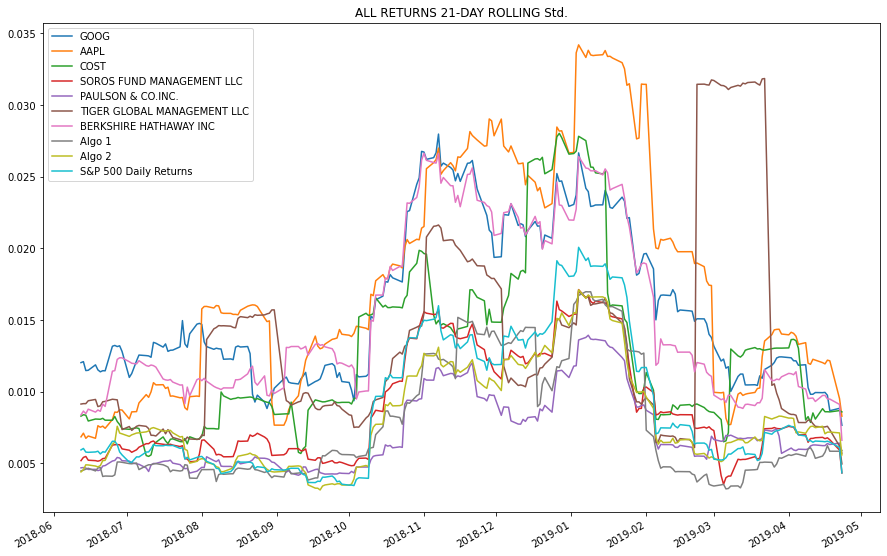

In [248]:
# Plot rolling standard deviation

all_returns.rolling(window=21).std().plot(title="ALL RETURNS 21-DAY ROLLING Std.", figsize=(15,10))

### Calculate and plot the correlation

In [249]:
# Calculate and plot the correlation
all_returns.corr()

,GOOG,AAPL,COST,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Algo 1,Algo 2,S&P 500 Daily Returns
GOOG,1.000000,0.692497,0.410074,0.682919,0.554123,0.291055,0.824391,0.272740,0.682227,0.792070
AAPL,0.692497,1.000000,0.433918,0.609126,0.544949,0.334864,0.694062,0.224385,0.639512,0.759909
COST,0.410074,0.433918,1.000000,0.518175,0.496810,0.353235,0.431956,0.139522,0.496460,0.590297
SOROS FUND MANAGEMENT LLC,0.682919,0.609126,0.518175,1.000000,0.791962,0.478627,0.816675,0.337826,0.862846,0.876981
PAULSON & CO.INC.,0.554123,0.544949,0.496810,0.791962,1.000000,0.485375,0.650758,0.361301,0.783656,0.766680
TIGER GLOBAL MANAGEMENT LLC,0.291055,0.334864,0.353235,0.478627,0.485375,1.000000,0.325457,0.114554,0.409496,0.481030
BERKSHIRE HATHAWAY INC,0.824391,0.694062,0.431956,0.816675,0.650758,0.325457,1.000000,0.327000,0.782804,0.852303
Algo 1,0.272740,0.224385,0.139522,0.337826,0.361301,0.114554,0.327000,1.000000,0.365512,0.289358
Algo 2,0.682227,0.639512,0.496460,0.862846,0.783656,0.409496,0.782804,0.365512,1.000000,0.875721
S&P 500 Daily Returns,0.792070,0.759909,0.590297,0.876981,0.766680,0.481030,0.852303,0.289358,0.875721,1.000000


### Calculate and Plot Rolling 60-day Beta for Your Portfolio compared to the S&P 500

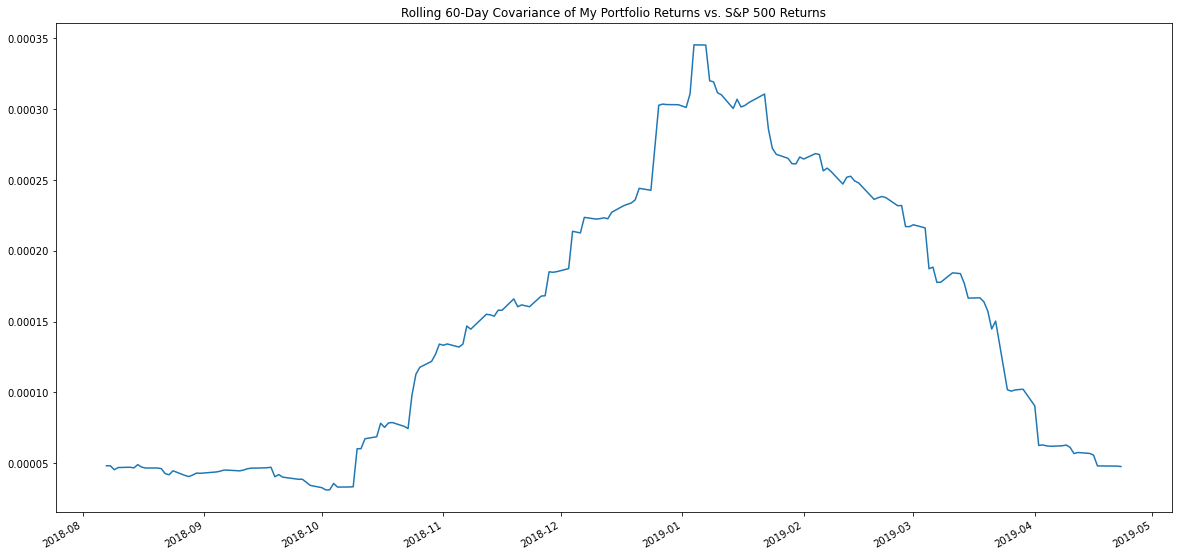

In [268]:
# Calculate 60-day rolling covariance of GOOG vs. S&P 500 and plot the data
rolling60_goo_covar_all_returns = all_returns['GOOG'].rolling(window=60).cov(all_returns['S&P 500 Daily Returns'])
rolling60_goo_covar_all_returns.plot(figsize=(20, 10), title='Rolling 60-Day Covariance of My Portfolio Returns vs. S&P 500 Returns')

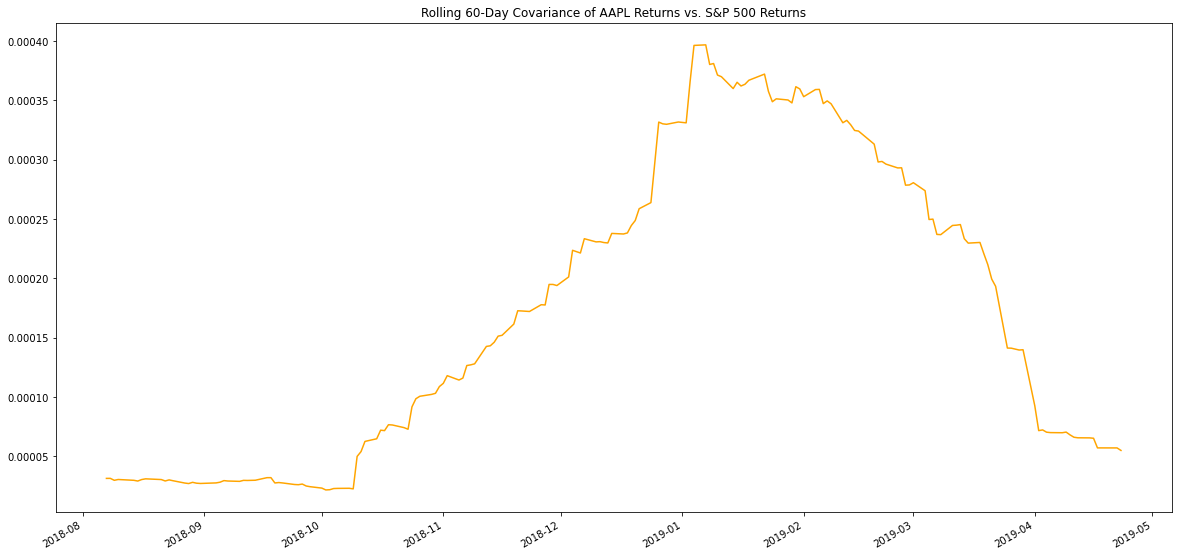

In [269]:
# Calculate 60-day rolling covariance of AAPL vs. S&P 500 and plot the data
rolling60_aapl_covar_all_returns = all_returns['AAPL'].rolling(window=60).cov(all_returns['S&P 500 Daily Returns'])
rolling60_aapl_covar_all_returns.plot(figsize=(20, 10), title='Rolling 60-Day Covariance of AAPL Returns vs. S&P 500 Returns', color='orange')

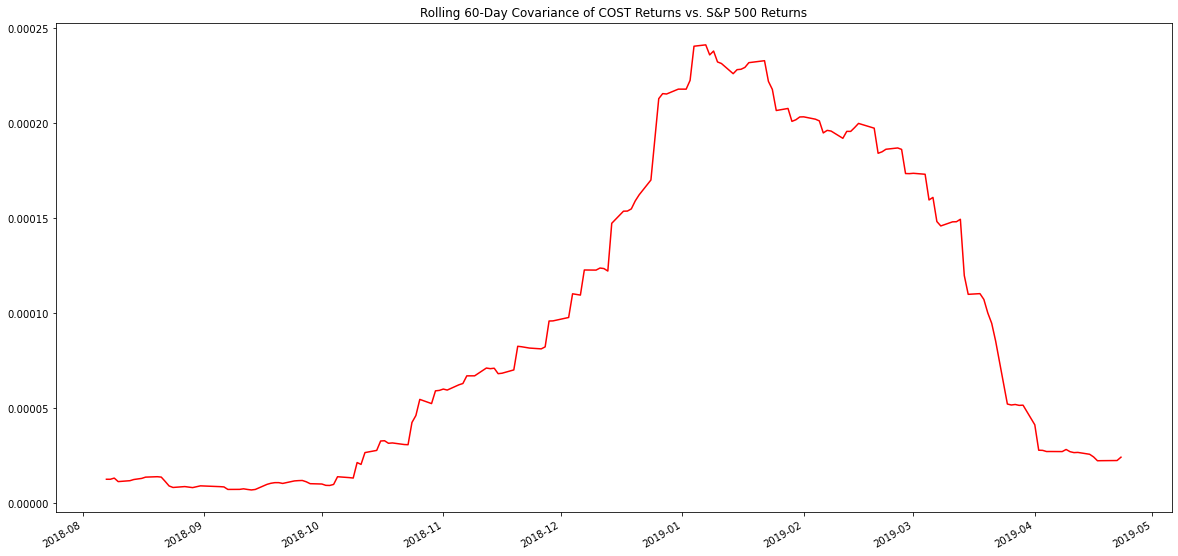

In [271]:
# Calculate 60-day rolling covariance of COST vs. S&P 500 and plot the data
rolling60_cost_covar_all_returns = all_returns['COST'].rolling(window=60).cov(all_returns['S&P 500 Daily Returns'])
rolling60_cost_covar_all_returns.plot(figsize=(20, 10), title='Rolling 60-Day Covariance of COST Returns vs. S&P 500 Returns', color='red')

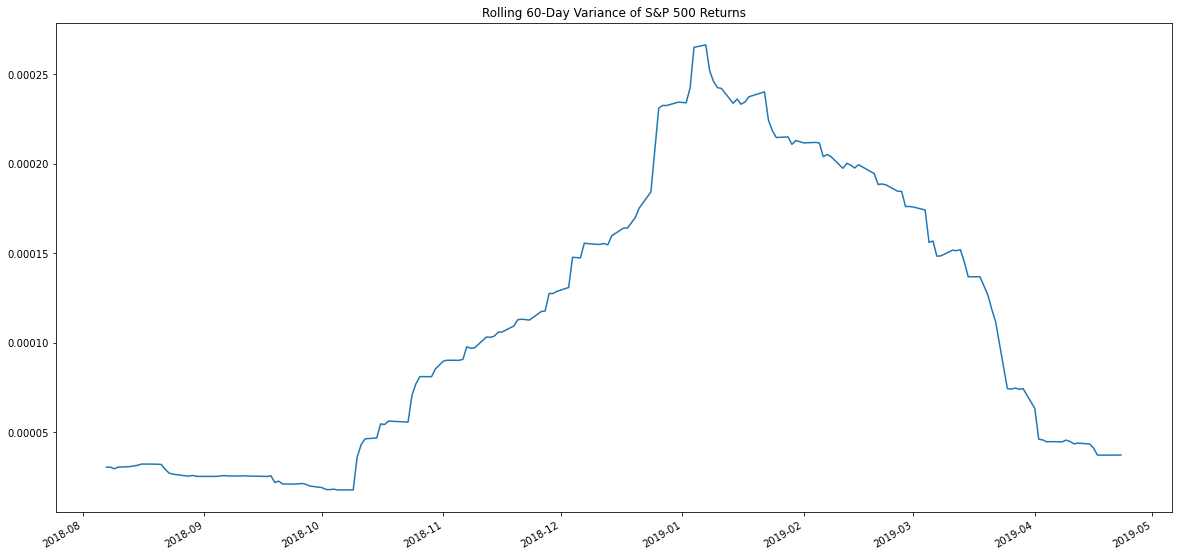

In [272]:
# Calculate 60-day rolling variance of My Portfolio vs. S&P 500 and plot the data
rolling60_var_all_returns = all_returns['S&P 500 Daily Returns'].rolling(window=60).var()
rolling60_var_all_returns.plot(figsize=(20, 10), title='Rolling 60-Day Variance of S&P 500 Returns')


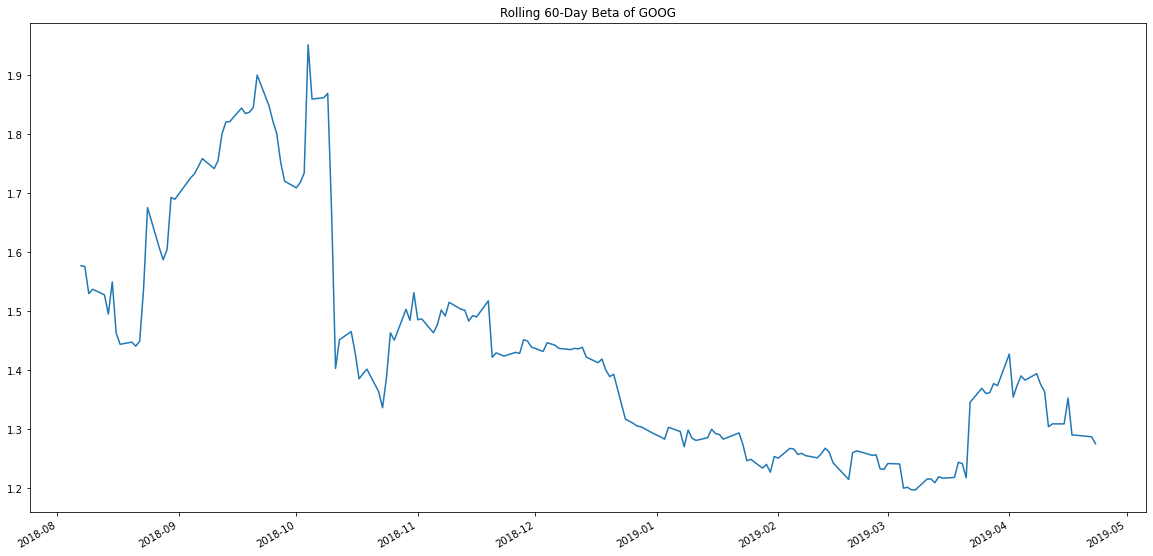

In [273]:
# Calculate 60-day rolling beta of GOOG and plot the data
rolling60_goo_beta_all_returns = rolling60_goo_covar_all_returns / rolling60_var_all_returns
rolling60_goo_beta_all_returns.plot(figsize=(20, 10), title='Rolling 60-Day Beta of GOOG')

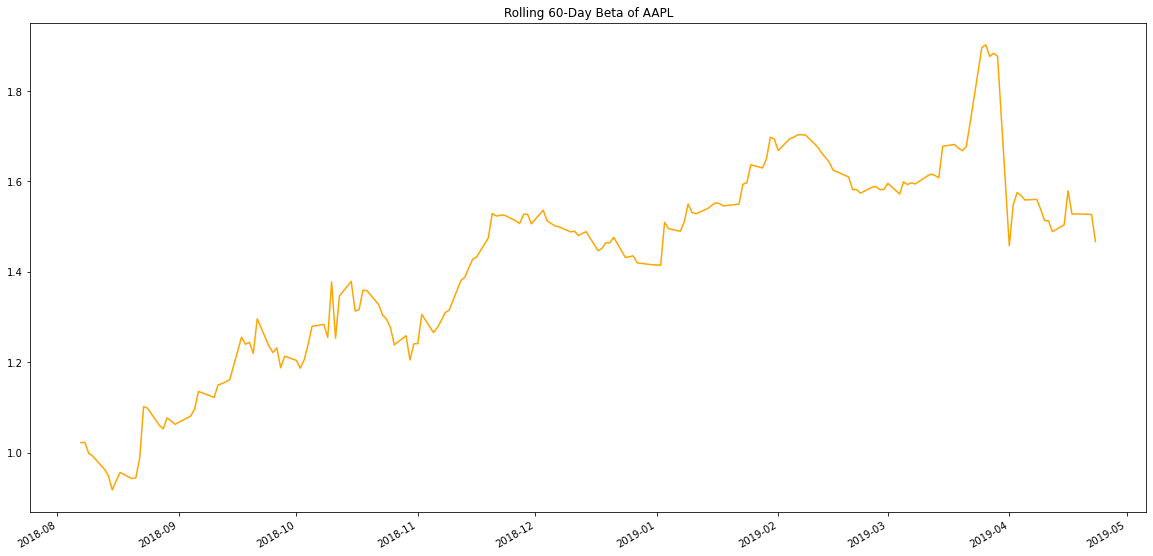

In [275]:
# Calculate 60-day rolling beta of AAPL and plot the data
rolling60_aapl_beta_all_returns = rolling60_aapl_covar_all_returns / rolling60_var_all_returns
rolling60_aapl_beta_all_returns.plot(figsize=(20, 10), title='Rolling 60-Day Beta of AAPL', color='orange')

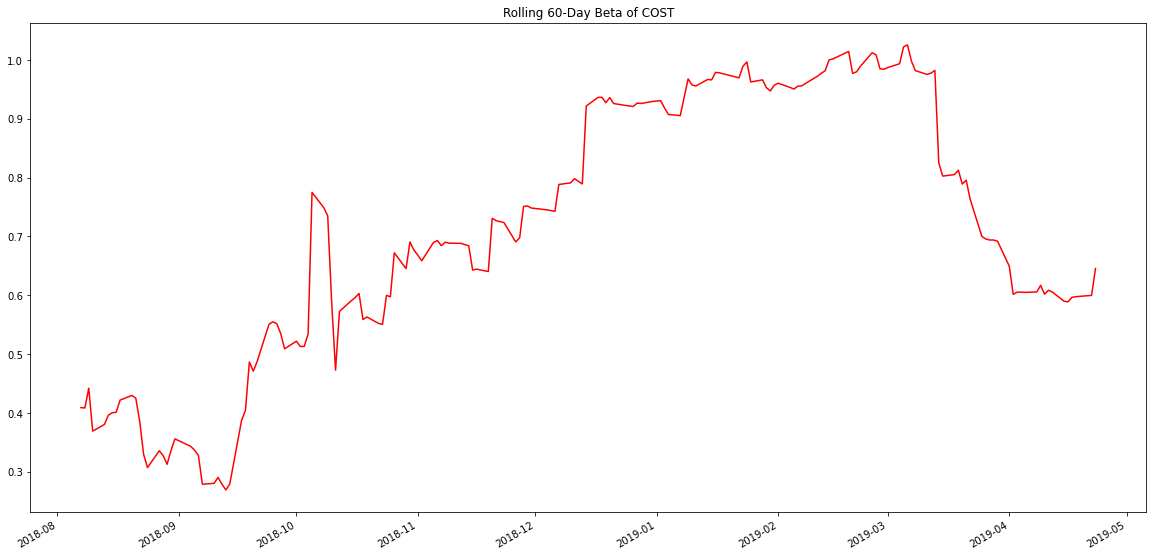

In [276]:
# Calculate 60-day rolling beta of COST and plot the data
rolling60_cost_beta_all_returns = rolling60_cost_covar_all_returns / rolling60_var_all_returns
rolling60_cost_beta_all_returns.plot(figsize=(20, 10), title='Rolling 60-Day Beta of COST', color='red')

### Using the daily returns, calculate and visualize the Sharpe ratios using a bar plot

In [279]:
# Calculate Annualzied Sharpe Ratios
#all_returns_sharpe_ratios = (all_returns.mean() * 252) / (all_returns.std() * np.sqrt(252))
all_returns_sharpe_ratios = (all_returns.mean() * 252) / (all_returns_annualized_std)
all_returns_sharpe_ratios

AAPL                           0.490850
Algo 1                         2.035665
Algo 2                         0.080607
BERKSHIRE HATHAWAY INC         0.159756
COST                           1.244419
GOOG                           0.714034
PAULSON & CO.INC.              0.258738
S&P 500 Daily Returns          0.584820
SOROS FUND MANAGEMENT LLC      0.430713
TIGER GLOBAL MANAGEMENT LLC   -1.034216
dtype: float64

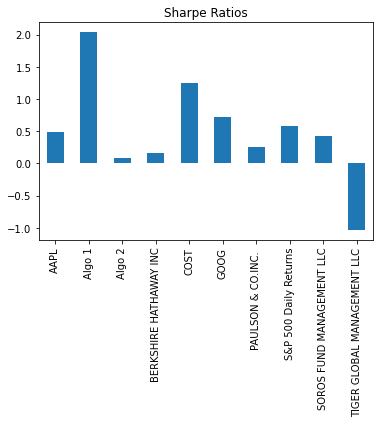

In [280]:
# Visualize the sharpe ratios as a bar plot
all_returns_sharpe_ratios.plot(kind="bar", title="Sharpe Ratios")

### How does your portfolio do?

Write your answer here!

In [ ]:
#While my portfolio doesn't outperform Algo 1 however it does outperform or is on par with whale portfolio and offers
#better returns on a risk free bases as compared to S&P and whale portfolio. On annualized basis GOOG & AAPL have highest
#std and COST std is higher than all except Bershire and Tiger however, COST shows to be a better risk free investment
#than GOOG & AAPL.